# cars analysis

Import the libraries and clean data 

In [296]:
import pandas as pd
import numpy as np

from hijri_converter import Hijri, Gregorian
from matplotlib import pyplot as plt
import seaborn as sns


from arabic_reshaper import reshape
from bidi.algorithm import get_display


In [297]:
df_data = pd.read_excel("cars_data.xlsx")
df_data


,id,name,age,DoB,gender,nationality,city_ar,city_en,region_ar,region_en,region_population,car_manufacturer,car_model,car_year,car_type,car_price,purchase_date
0,1124490196,ghareebah zaman fudail,46,1975-12-06,female,Saudi,صامطة,Samtah,منطقة جازان,Jazan,1365110,Dodge,Viper,2010,Convertible,147310,2021-09-13
1,1207380224,rona bashaar ataallah,51,1970-05-28,female,Saudi,الحصون,Al Husun,منطقة الرياض,Riyadh,6777146,Land Rover,LR4,2018,NaN,87367,2021-04-05
2,1253616678,malmal abdulkareem junaid,20,2001-12-20,female,Saudi,شرورة,Sharurah,منطقة نجران,Najran,505652,Nissan,Sentra,2016,NaN,190681,2019-01-30
3,1240608461,jawl abdulqawi fatin,24,1997-08-26,female,Saudi,أم طليح,Umm Tulayh,منطقة الرياض,Riyadh,6777146,Suzuki,SX4,2013,Sedan,98804,2018-11-08
4,1265165351,faraj habbab kasib,42,1980-01-12,male,Saudi,رياض قناء,Riyad Qana,منطقة القصيم,Qassim,1215858,Infiniti,QX56,2016,NaN,194421,2017-02-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1219237220,shafiah shabbir nashwan,43,1979-02-07,female,Saudi,عرضين,Ardayn,منطقة عسير,Asir,1913392,Chevrolet,Impala,2012,NaN,88754,2021-06-26
19996,1232192265,adli ahad razin,26,1995-12-14,male,Saudi,اللويبدة,Al Luwaybidah,منطقة حائل,Hail,597144,Acura,ZDX,2016,NaN,98151,2019-11-24
19997,1110020910,thubaytah abdulbaasit tanwir,17,2004-06-01,female,Saudi,الوجية,Al Wajih,منطقة عسير,Asir,1913392,Buick,Lucerne,2015,NaN,104601,2017-09-22
19998,1542470532,aalim zaroon hashir,56,1965-10-21,male,Saudi,القافلة,Al Qafilah,منطقة المدينة المنورة,Madinah,1777933,Chevrolet,Avalanche,2014,NaN,160434,2019-10-31


In [298]:
df_data.describe(include='all')

,id,name,age,DoB,gender,nationality,city_ar,city_en,region_ar,region_en,region_population,car_manufacturer,car_model,car_year,car_type,car_price,purchase_date
count,2.000000e+04,20000,20000.000000,20000,20000,20000,18470,18498,18526,18492,2.000000e+04,20000,20000,20000.000000,6970,20000.000000,20000
unique,NaN,20000,NaN,13906,2,1,3909,3890,13,13,NaN,43,236,NaN,16,NaN,3794
top,NaN,waiz abdussalaam fayd,NaN,1990-11-20,female,Saudi,الروضة,Ar Rawdah,منطقة عسير,Asir,NaN,Chevrolet,2010,NaN,Sedan,NaN,2021-06-26
freq,NaN,1,NaN,7,10098,20000,48,47,4570,4595,NaN,1431,289,NaN,1546,NaN,25
mean,1.317496e+09,NaN,36.598900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.088857e+06,NaN,NaN,2015.371800,NaN,137961.546800,NaN
std,2.348557e+08,NaN,14.356863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.488441e+06,NaN,NaN,3.538346,NaN,33321.430666,NaN
min,1.100000e+09,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.205240e+05,NaN,NaN,2010.000000,NaN,80251.000000,NaN
25%,1.163274e+09,NaN,24.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.215858e+06,NaN,NaN,2012.000000,NaN,107319.000000,NaN
50%,1.226271e+09,NaN,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.913392e+06,NaN,NaN,2015.000000,NaN,137273.000000,NaN
75%,1.362351e+09,NaN,49.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.777146e+06,NaN,NaN,2019.000000,NaN,164804.000000,NaN


In [299]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 20000 non-null  int64 
 1   name               20000 non-null  object
 2   age                20000 non-null  int64 
 3   DoB                20000 non-null  object
 4   gender             20000 non-null  object
 5   nationality        20000 non-null  object
 6   city_ar            18470 non-null  object
 7   city_en            18498 non-null  object
 8   region_ar          18526 non-null  object
 9   region_en          18492 non-null  object
 10  region_population  20000 non-null  int64 
 11  car_manufacturer   20000 non-null  object
 12  car_model          20000 non-null  object
 13  car_year           20000 non-null  int64 
 14  car_type           6970 non-null   object
 15  car_price          20000 non-null  int64 
 16  purchase_date      20000 non-null  objec

In [300]:
df_subset= df_data[["age","DoB","gender","region_ar","car_manufacturer","car_model","car_type","car_price","region_population","car_year"]] 
df_subset

,age,DoB,gender,region_ar,car_manufacturer,car_model,car_type,car_price,region_population,car_year
0,46,1975-12-06,female,منطقة جازان,Dodge,Viper,Convertible,147310,1365110,2010
1,51,1970-05-28,female,منطقة الرياض,Land Rover,LR4,NaN,87367,6777146,2018
2,20,2001-12-20,female,منطقة نجران,Nissan,Sentra,NaN,190681,505652,2016
3,24,1997-08-26,female,منطقة الرياض,Suzuki,SX4,Sedan,98804,6777146,2013
4,42,1980-01-12,male,منطقة القصيم,Infiniti,QX56,NaN,194421,1215858,2016
...,...,...,...,...,...,...,...,...,...,...
19995,43,1979-02-07,female,منطقة عسير,Chevrolet,Impala,NaN,88754,1913392,2012
19996,26,1995-12-14,male,منطقة حائل,Acura,ZDX,NaN,98151,597144,2016
19997,17,2004-06-01,female,منطقة عسير,Buick,Lucerne,NaN,104601,1913392,2015
19998,56,1965-10-21,male,منطقة المدينة المنورة,Chevrolet,Avalanche,NaN,160434,1777933,2014


In [301]:
pd.to_datetime(df_subset["DoB"])

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 1405-12-16 00:00:00

In [ ]:
df_subset.columns[df_subset.isnull().any()]

In [ ]:
df_subset["car_type"].astype(str)

In [ ]:
df_subset.info()

In [302]:
df_subset[df_subset["region_ar"].isnull()]

,age,DoB,gender,region_ar,car_manufacturer,car_model,car_type,car_price,region_population,car_year
32,35,1407-04-17,female,NaN,Acura,MDX,NaN,123981,597144,2013
39,14,1429-02-08,male,NaN,Hyundai,Genesis,Sedan,148196,1777933,2011
51,48,1393-03-26,male,NaN,Volkswagen,Routan,NaN,172893,6777146,2014
54,51,1390-06-26,female,NaN,Buick,Enclave,NaN,142392,791535,2019
57,28,1414-02-25,male,NaN,Chevrolet,Cruze,NaN,183436,1913392,2014
...,...,...,...,...,...,...,...,...,...,...
19908,14,1428-11-25,male,NaN,Infiniti,FX,NaN,118878,6777146,2015
19915,17,1425-11-15,male,NaN,GMC,Yukon,Hybrid,112052,6777146,2020
19917,42,1399-09-21,female,NaN,Lincoln,MKZ,Sedan,88397,1215858,2015
19957,49,1392-11-26,female,NaN,Dodge,Viper,Convertible,147310,6777146,2010


In [303]:
df_subset.columns[df_subset.isnull().any()]

Index(['region_ar', 'car_type'], dtype='object')

In [304]:
def correct_date(date):
    year,month,day = date.split("-")
    if int(year)<1900:
        return pd.to_datetime(Hijri(int(year),int(month),int(day)).to_gregorian())
    else:
        return pd.to_datetime(date)
    
def get_age(date):
    return (pd.to_datetime("25-05-2022")-pd.to_datetime(date)).days//365

In [305]:
df_subset["DoB"] = df_subset["DoB"].apply(correct_date)

<ipython-input-305-b775ac054474>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset["DoB"] = df_subset["DoB"].apply(correct_date)


In [306]:
df_subset["calculated_age"] = df_subset["DoB"].apply(get_age)

<ipython-input-306-e969b245ddf1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset["calculated_age"] = df_subset["DoB"].apply(get_age)


In [307]:
df_subset[["age","calculated_age"]]

,age,calculated_age
0,46,46
1,51,52
2,20,20
3,24,24
4,42,42
...,...,...
19995,43,43
19996,26,26
19997,17,17
19998,56,56


In [308]:
def get_region_using_dict(population):
    region_population_dictionary = {
        6777146:"منطقة الرياض",
        6915006:"منطقة مكة ",
        1777933:" منطقة المدينة",
        1215858:" منطقة القصيم",
        4105780:"المنطقة الشرقية",
        1913392:" منطقة عسير",
        791535:" منطقة تبوك",
        597144:"منطقة حايل",
        320524:"الحدود الشمالية",
        1365110:" منطقة جازان",
        505652:" منطقة نجران",
        411888:" منطقة الباحة",
        440009:"منطقة الجوف",
        np.nan:"غير محدد",
    }
    return region_population_dictionary[population]

In [309]:
df_subset["region_ar"] = df_subset["region_population"].apply(get_region_using_dict)

<ipython-input-309-8ce9e75ab23f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset["region_ar"] = df_subset["region_population"].apply(get_region_using_dict)


In [310]:
df_subset["car_type"] = df_subset["car_type"].fillna("Unknown")

<ipython-input-310-87fbccd343c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset["car_type"] = df_subset["car_type"].fillna("Unknown")


In [311]:
df_subset[df_subset.isnull().any(axis=1)]

,age,DoB,gender,region_ar,car_manufacturer,car_model,car_type,car_price,region_population,car_year,calculated_age


In [312]:
df_subset.columns[df_subset.isnull().any()]

Index([], dtype='object')

# Data Visualization

### Examine the data using three points

- mmm
- kkk
- kk

<AxesSubplot:xlabel='gender', ylabel='car_price'>

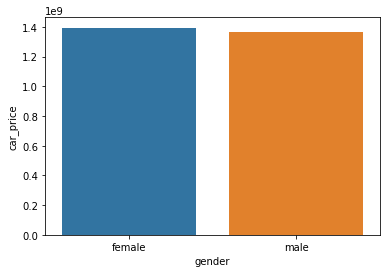

In [313]:
#drow the chart by sum price cars bettwen man and women 


sns.barplot(x="gender", y="car_price", data=df_subset,estimator=sum, ci=None)



<AxesSubplot:xlabel='car_type', ylabel='count'>

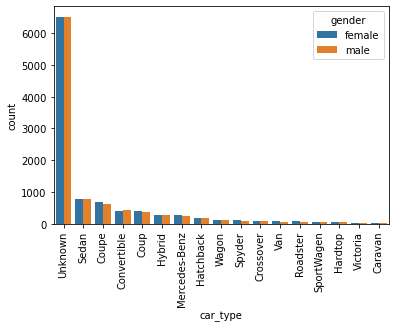

In [314]:
plt.xticks(rotation=90)

sns.countplot(data=df_subset, x="car_type",hue='gender', order = df_subset['car_type'].value_counts().index)

In [315]:
df_subset["car_year"].min()

2010

In [316]:
df_subset["car_year"].max()

2021

In [317]:
def most_popular(year):
    if year == 2010:
        return "golden"
    elif year == 2011:
        return "silver"
    elif year ==  2012:
        return "blue"
    elif year == 2013:
        return "brouwn"
    elif year == 2014:
        return "Olive"
    elif year == 2015:
        return "Red"
    elif year == 2016:
        return "Green"
    elif year == 2017:
        return "Plum Crazy Pearl"
    elif year == 2018:
        return "Header Orang"
    elif year == 2019: 
        return "Bright White"
    elif year == 2020: 
        return "Black white"
    else:
        return "Black"

In [318]:
df_subset["Most_color"] = df_subset["car_year"].apply(most_popular)

<ipython-input-318-7ba8c98d7914>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset["Most_color"] = df_subset["car_year"].apply(most_popular)


In [319]:
df_subset

,age,DoB,gender,region_ar,car_manufacturer,car_model,car_type,car_price,region_population,car_year,calculated_age,Most_color
0,46,1975-12-06,female,منطقة جازان,Dodge,Viper,Convertible,147310,1365110,2010,46,golden
1,51,1970-05-28,female,منطقة الرياض,Land Rover,LR4,Unknown,87367,6777146,2018,52,Header Orang
2,20,2001-12-20,female,منطقة نجران,Nissan,Sentra,Unknown,190681,505652,2016,20,Green
3,24,1997-08-26,female,منطقة الرياض,Suzuki,SX4,Sedan,98804,6777146,2013,24,brouwn
4,42,1980-01-12,male,منطقة القصيم,Infiniti,QX56,Unknown,194421,1215858,2016,42,Green
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,43,1979-02-07,female,منطقة عسير,Chevrolet,Impala,Unknown,88754,1913392,2012,43,blue
19996,26,1995-12-14,male,منطقة حايل,Acura,ZDX,Unknown,98151,597144,2016,26,Green
19997,17,2004-06-01,female,منطقة عسير,Buick,Lucerne,Unknown,104601,1913392,2015,17,Red
19998,56,1965-10-21,male,منطقة المدينة,Chevrolet,Avalanche,Unknown,160434,1777933,2014,56,Olive


<AxesSubplot:xlabel='Most_color', ylabel='count'>

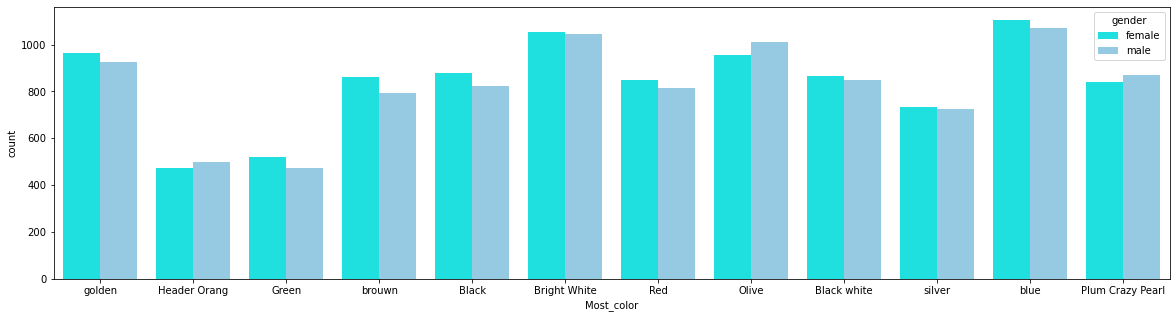

In [320]:
plt.figure(figsize=(20,5))

sns.countplot(data=df_subset, x="Most_color",hue='gender', palette=["#00FFFF","#89CFF0"])


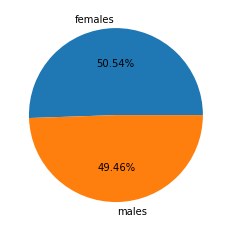

In [321]:

females = df_subset[df_subset["gender"]=='female']["car_price"].sum()
males = df_subset[df_subset["gender"]=='male']["car_price"].sum()

total = df_subset["car_price"].sum()

percentages = [females/total, males/total]

plt.pie(percentages, labels=['females','males'], autopct='%.2f%%')
plt.show()

(array([2805., 2201., 3595.,  919., 1965., 2625., 1496., 1898., 1486.,
        1010.]),
 array([ 0. ,  4.2,  8.4, 12.6, 16.8, 21. , 25.2, 29.4, 33.6, 37.8, 42. ]),
 <BarContainer object of 10 artists>)

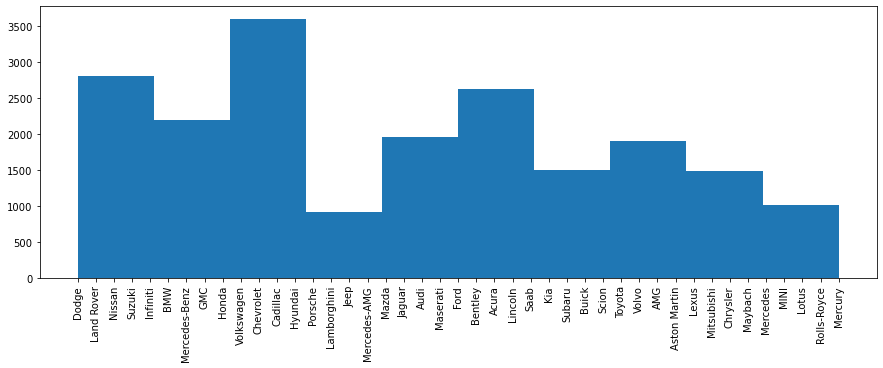

In [322]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
plt.hist(df_subset["car_manufacturer"])

# transform the arabic text

In [323]:
def transform_arabic(text):
    new_text = reshape(text)
    return get_display(new_text)

In [324]:
df_subset["region_ar"]

0           منطقة جازان
1          منطقة الرياض
2           منطقة نجران
3          منطقة الرياض
4          منطقة القصيم
              ...      
19995        منطقة عسير
19996        منطقة حايل
19997        منطقة عسير
19998     منطقة المدينة
19999        منطقة حايل
Name: region_ar, Length: 20000, dtype: object

In [325]:
df_subset["region_transformed"] = df_subset["region_ar"].apply(transform_arabic)

<ipython-input-325-5e24b779025a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset["region_transformed"] = df_subset["region_ar"].apply(transform_arabic)


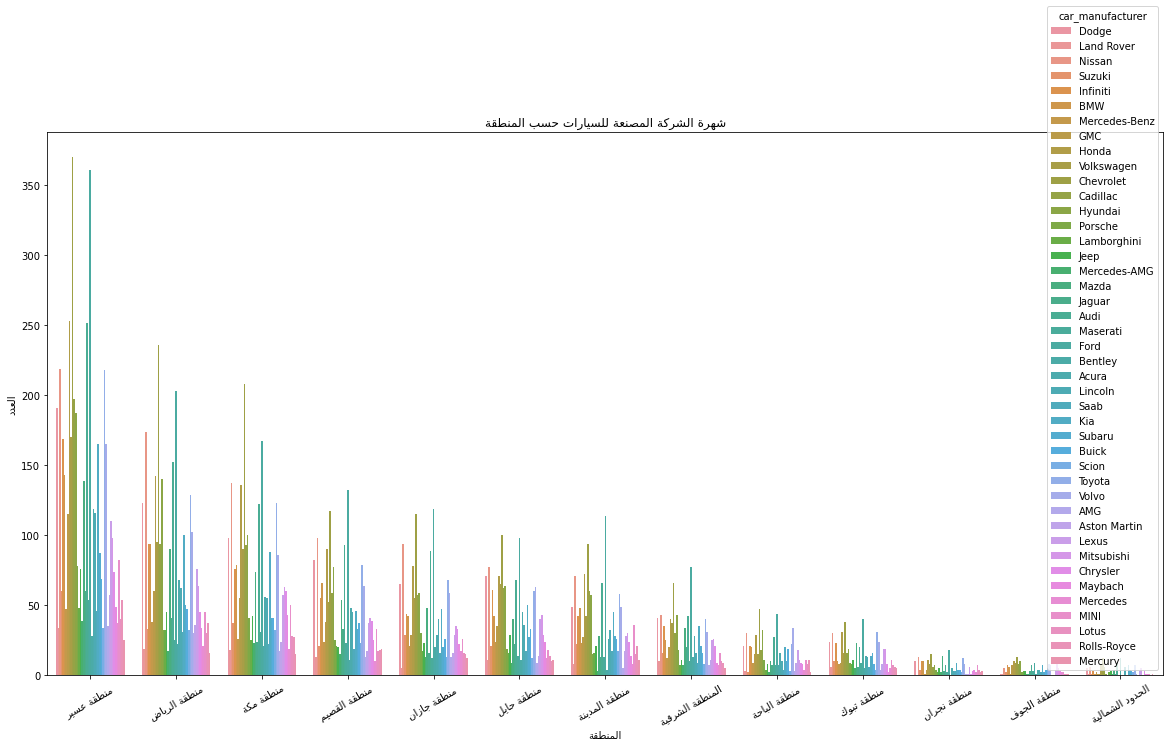

In [334]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=30)
sns.countplot(data=df_subset, x='region_transformed', hue='car_manufacturer', order=df_subset["region_transformed"].value_counts(ascending=False).keys())


_title = "شهرة الشركة المصنعة للسيارات حسب المنطقة"
_title = transform_arabic(_title)
plt.title(_title)

_xlabel = 'المنطقة'
_xlabel = transform_arabic(_xlabel)
plt.xlabel(_xlabel)

_ylabel = 'العدد'
_ylabel = transform_arabic(_ylabel)
plt.ylabel(_ylabel)

plt.show()

# Thank you :)